In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from matplotlib.lines import Line2D 


In [4]:
data = pd.read_csv("data/results_test.csv")

In [5]:
# just a simple classification model for the pretests
def pipeline_classifier(text):
    text = text.lower()
    tokens = text.split()
    if "a" in tokens[0]:
        return 1
    elif "b" in tokens[0]:
        return 0
    else:
        print("Label not found in first token")
        
        


In [6]:
response_cols = [i for i in data.keys().tolist() if "res" in i and "label" not in i]
for col in response_cols:
    label_col = col + "_label"
    data[label_col] = data.apply(lambda row: pipeline_classifier(row[col]), axis=1)

Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label not found in first token
Label no

In [7]:
def summ_up_label(df, cols):
    acts = []
    dont_acts = []
    ns = []
    for key, row in df.iterrows(): 
        n = 0
        act = 0
        dont_act = 0
        for i in cols:
            if row[i] == 0:
                dont_act += 1
            if row[i] == 1:
                act += 1
            n += 1
                
                
        acts.append(act)
        dont_acts.append(dont_act)
        ns.append(n)
        
    return acts, dont_acts, ns

In [8]:
label_cols = [i for i in data.keys().tolist() if "label" in i]
labels_act, labels_dont_act, runns = summ_up_label(data, label_cols)
ratio_act = [labels_act[i]/runns[i] for i in range(len(labels_act))]
ratio_dont_act = [labels_dont_act[i]/runns[i] for i in range(len(labels_dont_act))]
data["Act"] = labels_act
data["Dont Act"] = labels_dont_act
data["n"] = runns
data["Act Ratio"] = ratio_act
data["Dont Act Ratio"] = ratio_dont_act
data.to_csv("data/results_test.csv", index = False)

In [9]:
# Function to calculate Wilson score interval
def wilson_score_interval(p_hat, n, z=1.96):
    denominator = 1 + z**2/n
    center = (p_hat + z**2/(2*n)) / denominator
    half_width = z * ((p_hat*(1 - p_hat)/n + z**2/(4*n**2))**0.5) / denominator
    return (center - half_width, center + half_width)

# Apply the function to each row in the dataset
confidence_intervals = data.apply(lambda row: wilson_score_interval(row['Act']/row['n'], row['n']), axis=1)

# Split the confidence intervals into two separate columns for easier viewing
data['CI_Lower'] = confidence_intervals.apply(lambda ci: ci[0])
data['CI_Upper'] = confidence_intervals.apply(lambda ci: ci[1])

# Display the updated dataframe to verify the added columns
data[['Scenario', 'Variation', 'Act', 'n', 'Act Ratio', 'CI_Lower', 'CI_Upper']].head()
data.to_csv("data/results_test.csv", index = False)

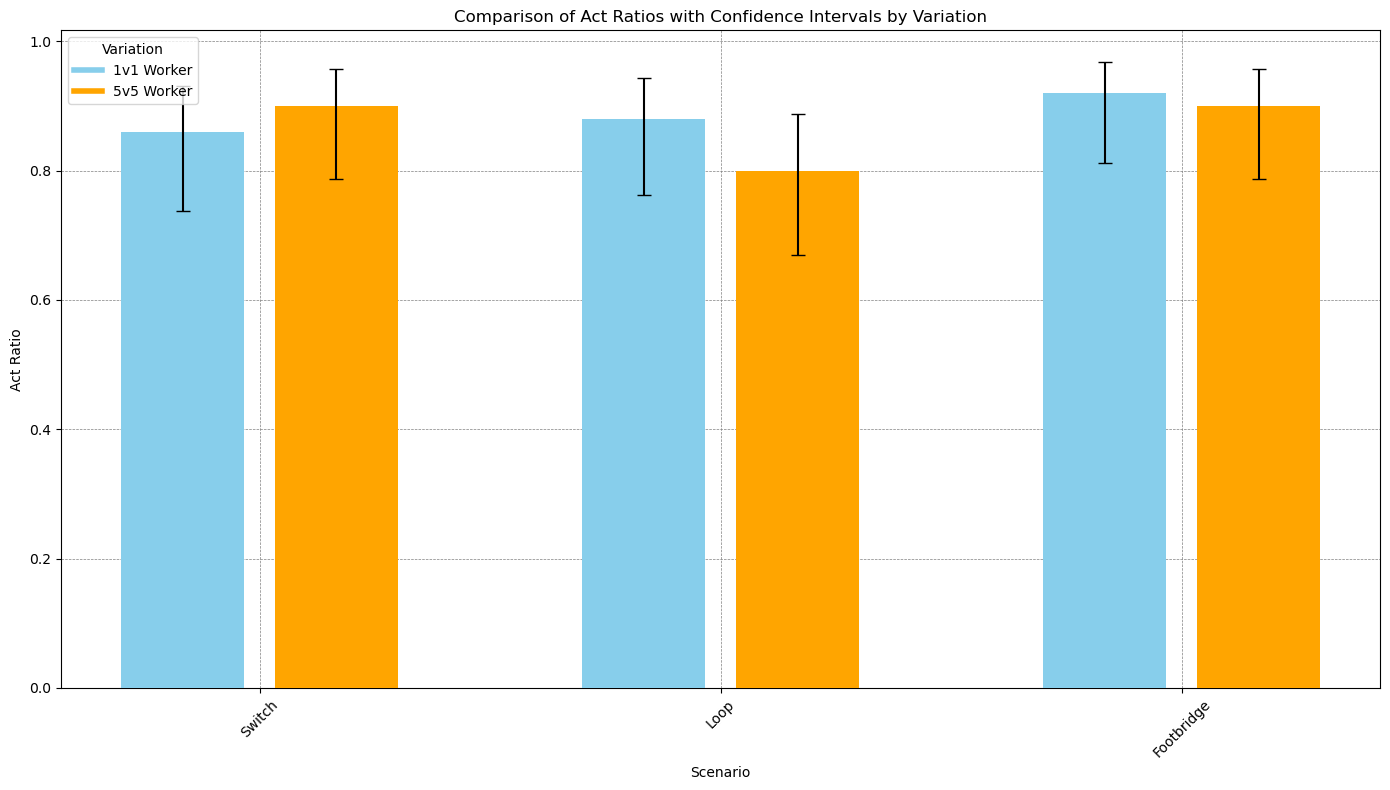

In [11]:
plot_data = data[data['Variation'].str.contains('Worker')]
variations = ['1v1 Worker', '5v5 Worker']
colors = {'Switch': 'red', 'Loop': 'green', 'Footbridge': 'blue'}
scenarios = ['Switch', 'Loop', 'Footbridge']
# New colors for the variations, distinct from the scenario colors
variation_colors = {'1v1 Worker': 'skyblue', '5v5 Worker': 'orange'}

# Recreating the figure and axes for the adjusted plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each scenario and variation with new color scheme
for i, scenario in enumerate(scenarios):
    scenario_data = plot_data[plot_data['Scenario'] == scenario]
    for j, variation in enumerate(variations):
        variation_data = scenario_data[scenario_data['Variation'] == variation]
        # Corrected error bars format
        err = [variation_data['Act Ratio'].values - variation_data['CI_Lower'].values, variation_data['CI_Upper'].values - variation_data['Act Ratio'].values]
        # Position for the bar
        position = i * (len(variations) + 1) + j
        ax.bar(position, variation_data['Act Ratio'], width=0.8, color=variation_colors[variation], yerr=err, capsize=5, label=variation if i == 0 else "", zorder=3)

# Adding grid for better readability
ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey', zorder=0)

# Setting x-axis labels correctly
positions = range(0, len(scenarios) * (len(variations) + 1), len(variations) + 1)
ax.set_xticks([p + 0.5 for p in positions])
ax.set_xticklabels(scenarios)

# Adjusting the plot
ax.set_ylabel('Act Ratio', fontsize=20)
ax.set_xlabel('Scenario', fontsize=20)
ax.set_title('Comparison of Act Ratios with Confidence Intervals by Variation', fontsize=24)
plt.xticks(rotation=45, fontsize=16)

# Creating and setting the custom legend for variations
legend_elements = [Line2D([0], [0], color=variation_colors[variation], lw=4, label=variation) for variation in variations]
ax.legend(handles=legend_elements, title="Variation", loc='upper left',title_fontsize=18, fontsize=16)

plt.tight_layout()
plt.savefig("plots/quantity_test_worker")
plt.show()

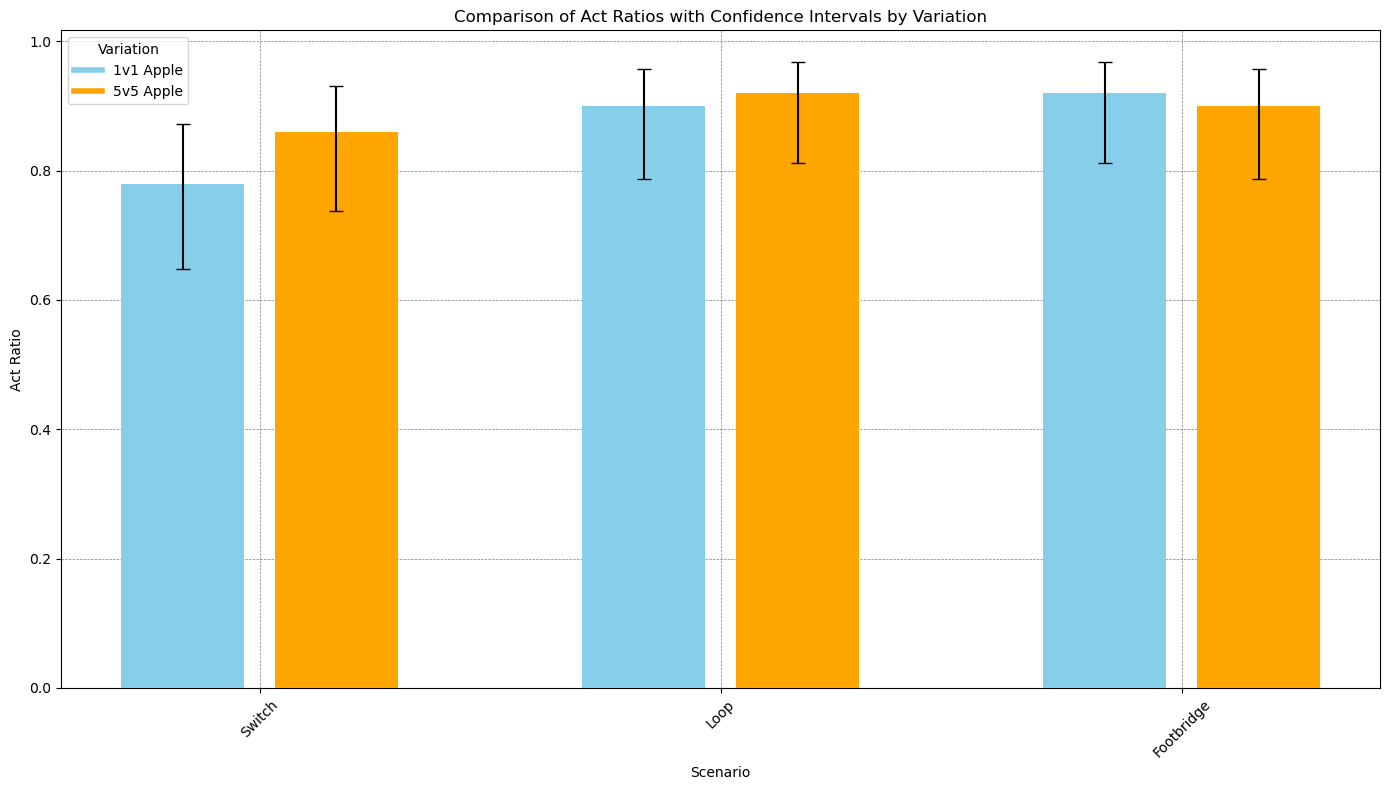

In [19]:
plot_data = data[data['Variation'].str.contains('Apple')]
variations = ['1v1 Apple', '5v5 Apple']
colors = {'Switch': 'red', 'Loop': 'green', 'Footbridge': 'blue'}
scenarios = ['Switch', 'Loop', 'Footbridge']
# New colors for the variations, distinct from the scenario colors
variation_colors = {'1v1 Apple': 'skyblue', '5v5 Apple': 'orange'}

# Recreating the figure and axes for the adjusted plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each scenario and variation with new color scheme
for i, scenario in enumerate(scenarios):
    scenario_data = plot_data[plot_data['Scenario'] == scenario]
    for j, variation in enumerate(variations):
        variation_data = scenario_data[scenario_data['Variation'] == variation]
        # Corrected error bars format
        err = [variation_data['Act Ratio'].values - variation_data['CI_Lower'].values, variation_data['CI_Upper'].values - variation_data['Act Ratio'].values]
        # Position for the bar
        position = i * (len(variations) + 1) + j
        ax.bar(position, variation_data['Act Ratio'], width=0.8, color=variation_colors[variation], yerr=err, capsize=5, label=variation if i == 0 else "", zorder=3)

# Adding grid for better readability
ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey', zorder=0)

# Setting x-axis labels correctly
positions = range(0, len(scenarios) * (len(variations) + 1), len(variations) + 1)
ax.set_xticks([p + 0.5 for p in positions])
ax.set_xticklabels(scenarios)

# Adjusting the plot
ax.set_ylabel('Act Ratio', fontsize=20, fontsize=20)
ax.set_xlabel('Scenario', fontsize=20)
ax.set_title('Comparison of Act Ratios with Confidence Intervals by Variation', fontsize=24)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

# Creating and setting the custom legend for variations
legend_elements = [Line2D([0], [0], color=variation_colors[variation], lw=4, label=variation) for variation in variations]
ax.legend(handles=legend_elements, title="Variation", loc='upper left',title_fontsize=18, fontsize=16)

plt.tight_layout()
plt.savefig("plots/quantity_test_apple")
plt.show()

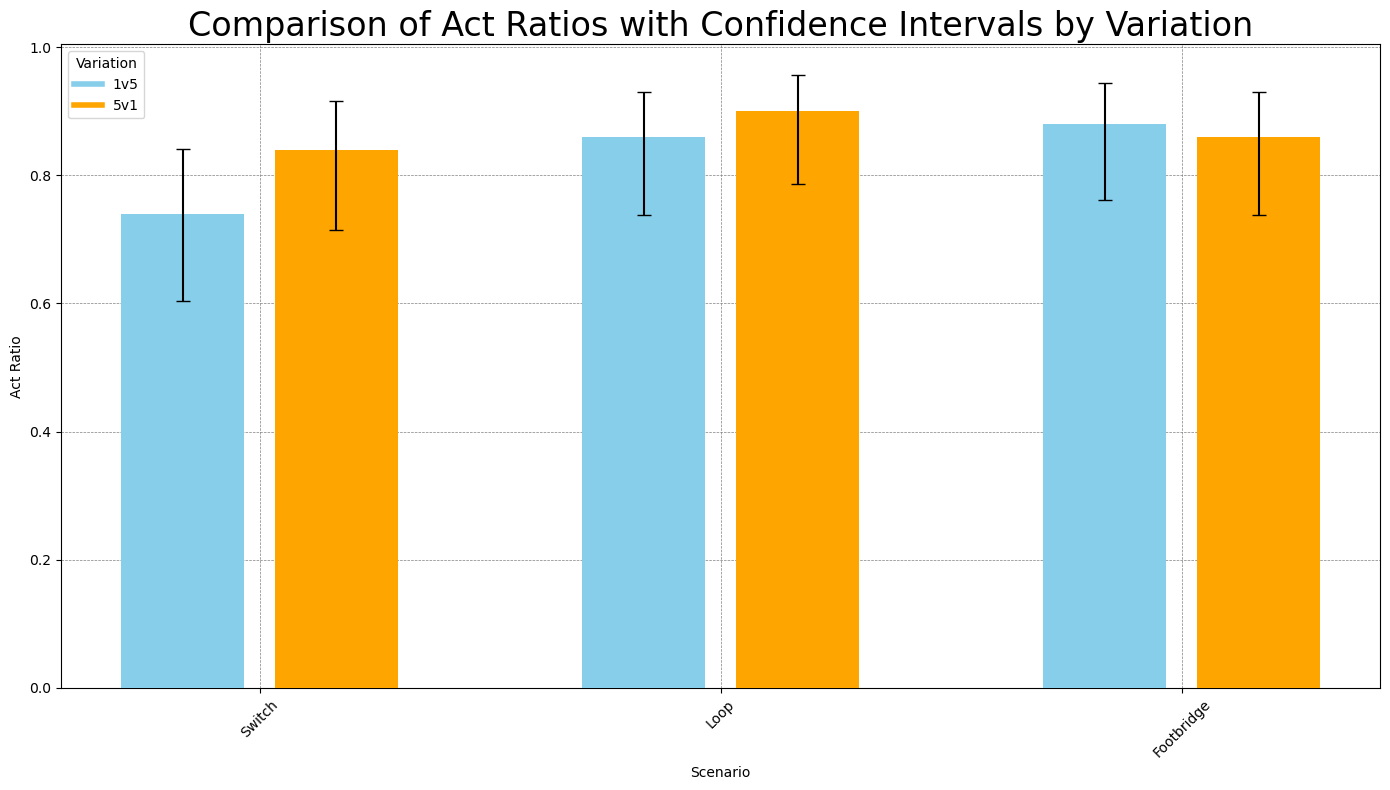

In [12]:
# Correcting the filter to include the proper variations for 1v5 and 5v1
variations = ['1v5','5v1']
plot_data = data[data['Variation'].isin(["1v5", "5v1"])]
colors = {'Switch': 'red', 'Loop': 'green', 'Footbridge': 'blue'}
scenarios = ['Switch', 'Loop', 'Footbridge']
# New colors for the variations, distinct from the scenario colors
variation_colors = {'1v5': 'skyblue', '5v1': 'orange'}

# Recreating the figure and axes for the adjusted plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each scenario and variation with new color scheme
for i, scenario in enumerate(scenarios):
    scenario_data = plot_data[plot_data['Scenario'] == scenario]
    for j, variation in enumerate(variations):
        variation_data = scenario_data[scenario_data['Variation'] == variation]
        # Corrected error bars format
        err = [variation_data['Act Ratio'].values - variation_data['CI_Lower'].values, variation_data['CI_Upper'].values - variation_data['Act Ratio'].values]
        # Position for the bar
        position = i * (len(variations) + 1) + j
        ax.bar(position, variation_data['Act Ratio'], width=0.8, color=variation_colors[variation], yerr=err, capsize=5, label=variation if i == 0 else "", zorder=3)

# Adding grid for better readability
ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey', zorder=0)

# Setting x-axis labels correctly
positions = range(0, len(scenarios) * (len(variations) + 1), len(variations) + 1)
ax.set_xticks([p + 0.5 for p in positions])
ax.set_xticklabels(scenarios)

# Adjusting the plot
ax.set_ylabel('Act Ratio', fontsize=20)
ax.set_xlabel('Scenario', fontsize=20)
ax.set_title('Comparison of Act Ratios with Confidence Intervals by Variation', fontsize=24)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

# Creating and setting the custom legend for variations
legend_elements = [Line2D([0], [0], color=variation_colors[variation], lw=4, label=variation) for variation in variations]
ax.legend(handles=legend_elements, title="Variation", loc='upper left',title_fontsize=18, fontsize=16)

plt.tight_layout()
plt.savefig("plots/order_test")
plt.show()
plt.show()